In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/by_dataset/bigram_type.csv')
df = df.sort_values(by='WILD', ascending=False)
df = df[['bigram_type'] + sorted(df.columns[1:])]
df.iloc[:, 1:] /= df.iloc[:, 1:].sum(axis=0)

print(df.shape)
df = df.loc[np.any(df.iloc[:, 1:] > 1e-4, axis=1), :]
print(df.shape)

df_log = df.iloc[:, 1:-1].div(df.WILD, axis=0).apply(np.log)
df_log = df_log.replace([ -np.inf, np.inf ], np.nan)
df_log

(8274, 9)
(537, 9)


,BIG,CVS,JLT,MNY,NTR,TBO,VDC
8194,-2.679682,-1.174055,-3.081561,-0.214193,NaN,-6.120318,-2.794034
8193,-2.510800,-1.152522,-2.374107,-0.298498,NaN,-3.743078,-2.609985
136,0.229417,-0.014316,0.561129,-0.010022,-0.215691,-0.805966,0.202759
135,0.257388,0.261543,-0.114801,0.098974,-0.260736,-0.966282,0.313940
138,0.196843,0.116283,-0.213209,-0.006647,-0.003470,-1.222282,0.236026
...,...,...,...,...,...,...,...
6779,NaN,-0.895942,NaN,5.400512,NaN,NaN,NaN
6498,-1.976592,0.683044,1.399380,5.883550,NaN,NaN,1.490008
6361,0.791801,NaN,6.655280,NaN,NaN,NaN,0.149349
6297,0.922987,NaN,6.972389,NaN,NaN,NaN,0.223377


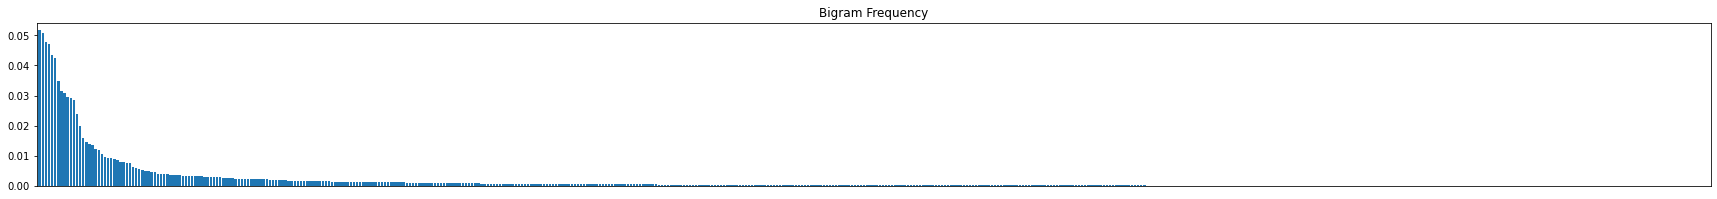

<Figure size 432x288 with 0 Axes>

In [2]:
plt.figure(figsize=(30, 3))
plt.bar(df.bigram_type, df.WILD)
plt.xticks([])
# plt.xticks(rotation=90)
plt.xlim(-1, df.shape[0])
plt.title('Bigram Frequency')
plt.show()
plt.savefig('img/wild-bigram-frequency.svg')

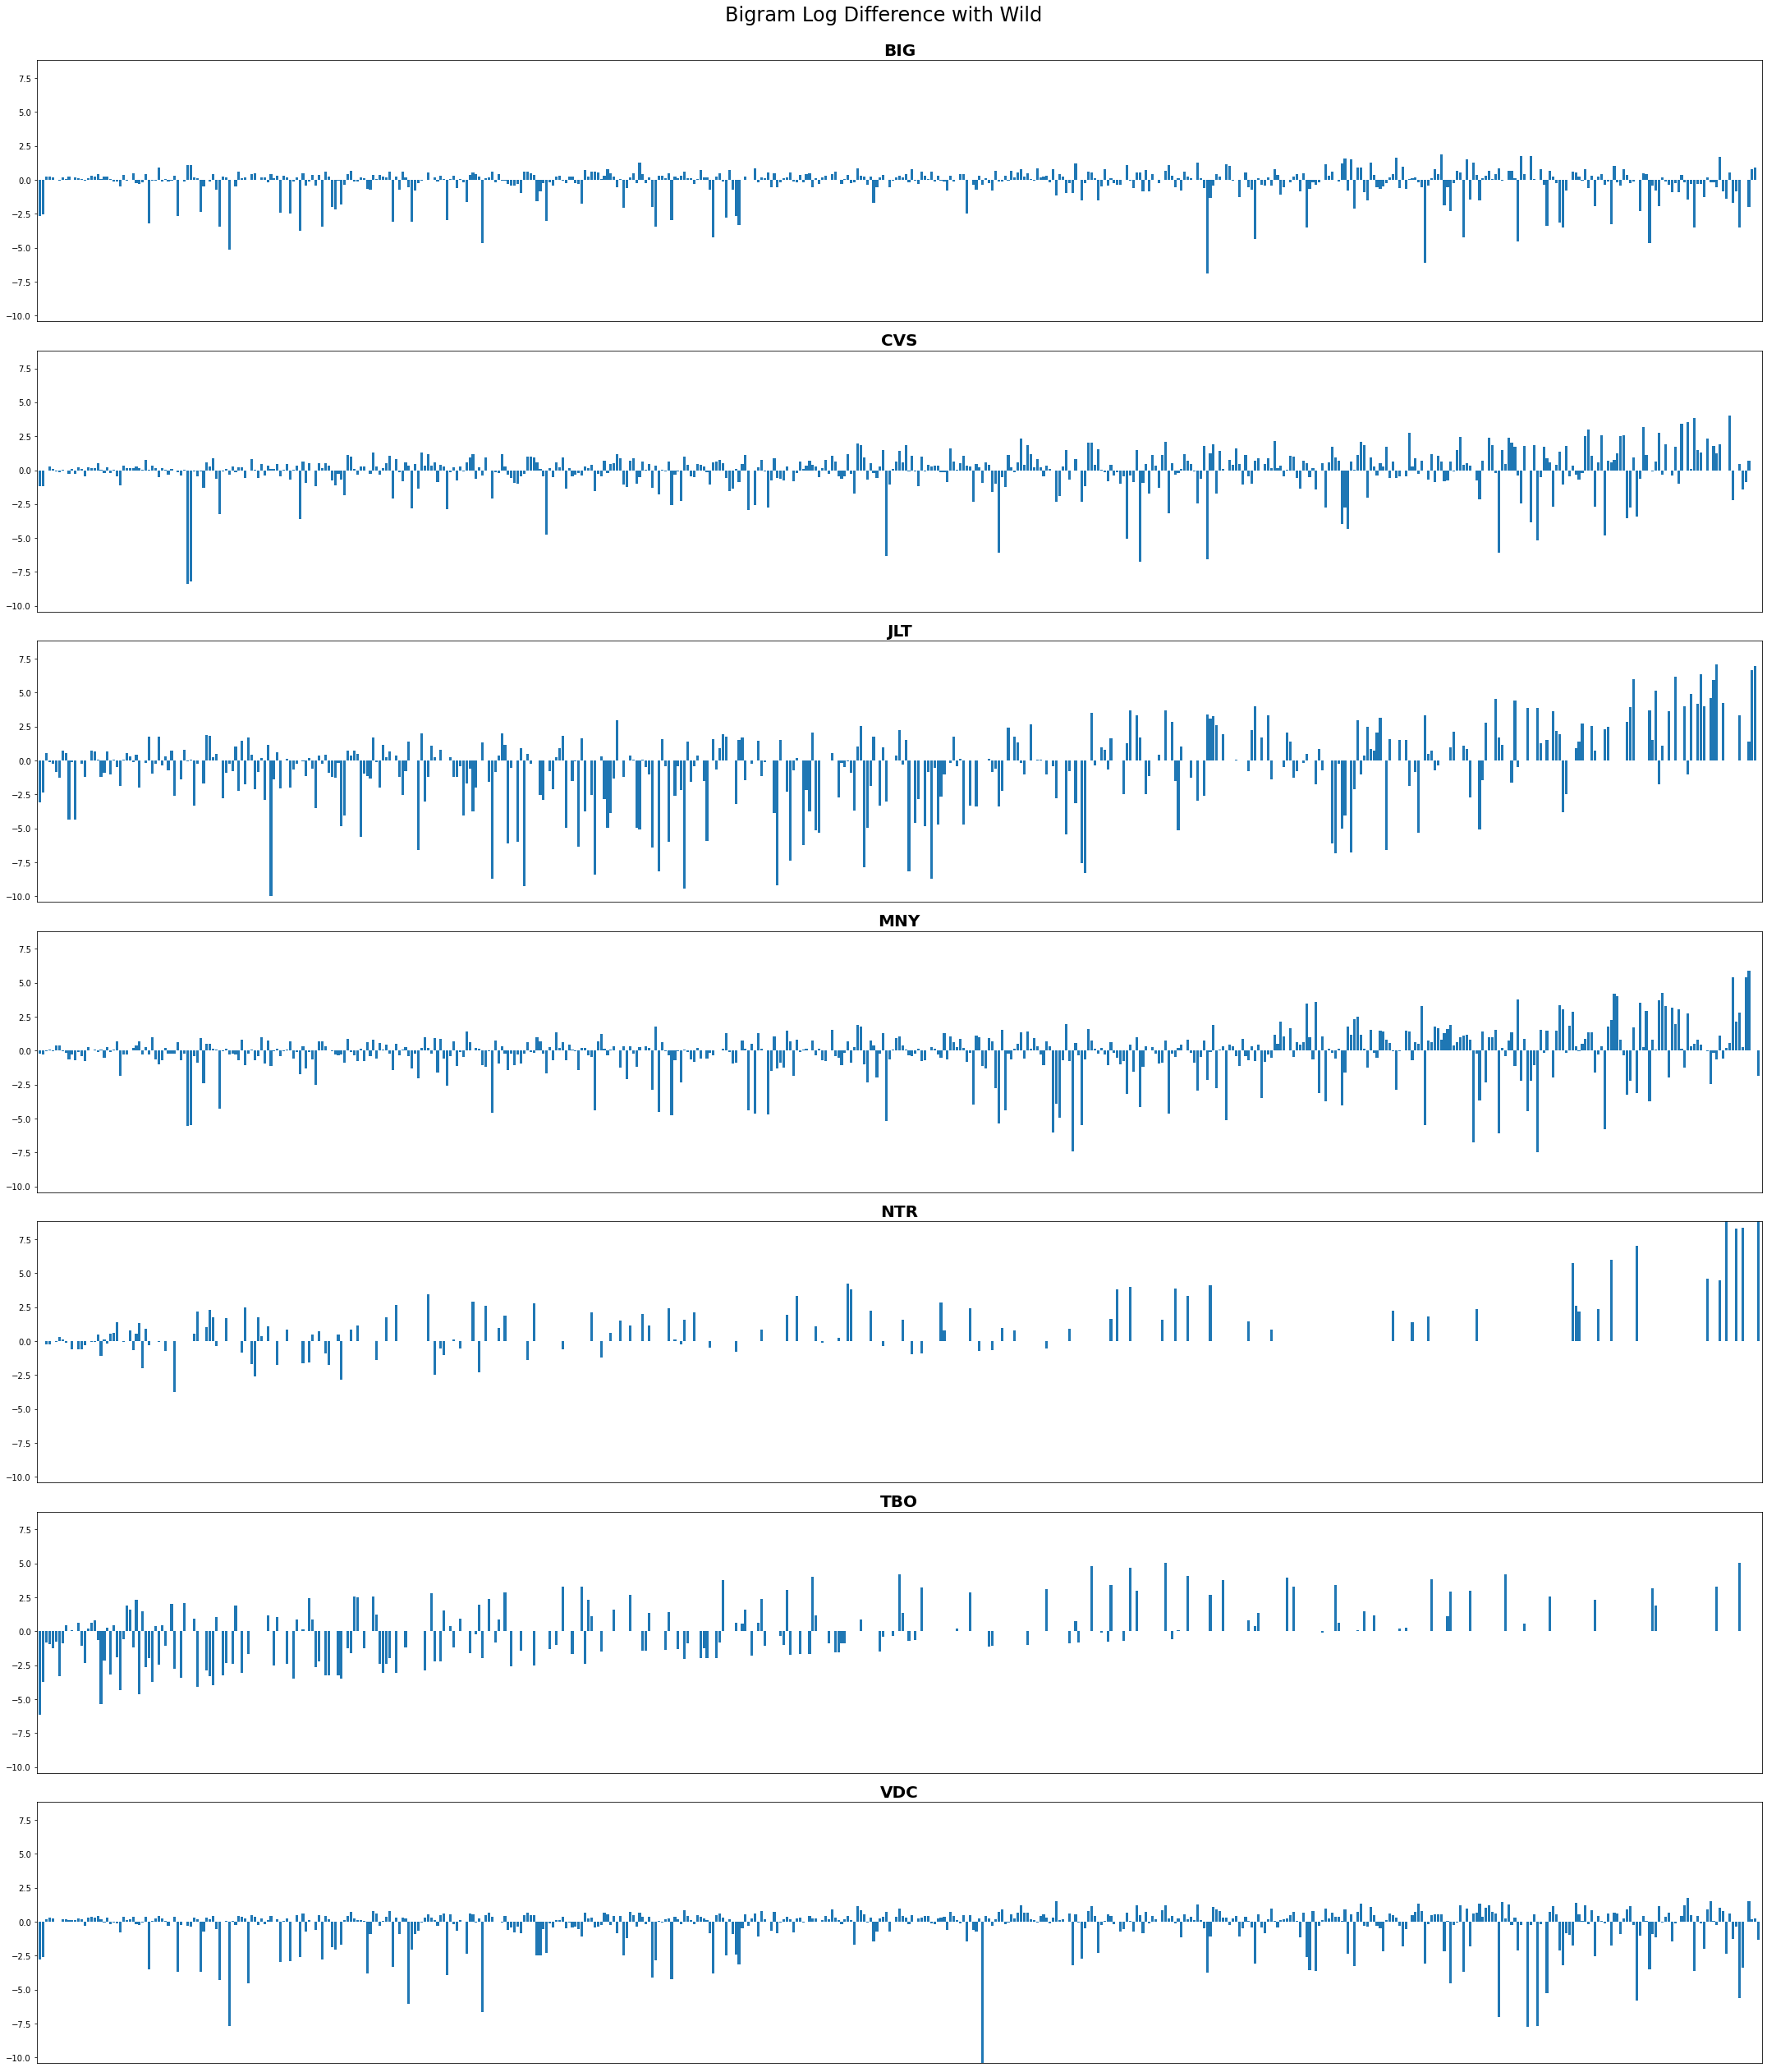

In [3]:
vals = df_log.iloc[1:-1].values
vals = vals[~np.isnan(vals)]
y_min, y_max = vals.min(), vals.max()
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(30, 5 * 7))

for name, ax in zip(df.columns[1:-1], axes.ravel()):
    ax.bar(df.bigram_type, df_log[name])
    ax.set_title(name, fontweight='bold', fontsize=20)
    ax.set_xticks([])
#     ax.set_xticks(df.bigram_type)
#     ax.set_xticklabels(df.bigram_type, rotation=90, fontsize=14)
    ax.set_xlim(-1, df.shape[0])
    ax.set_ylim(y_min, y_max)

fig.suptitle('Bigram Log Difference with Wild', fontsize=24, y=1.0)
fig.tight_layout()
fig.show()
plt.savefig('img/bigram-log-diff-with-wild.svg')

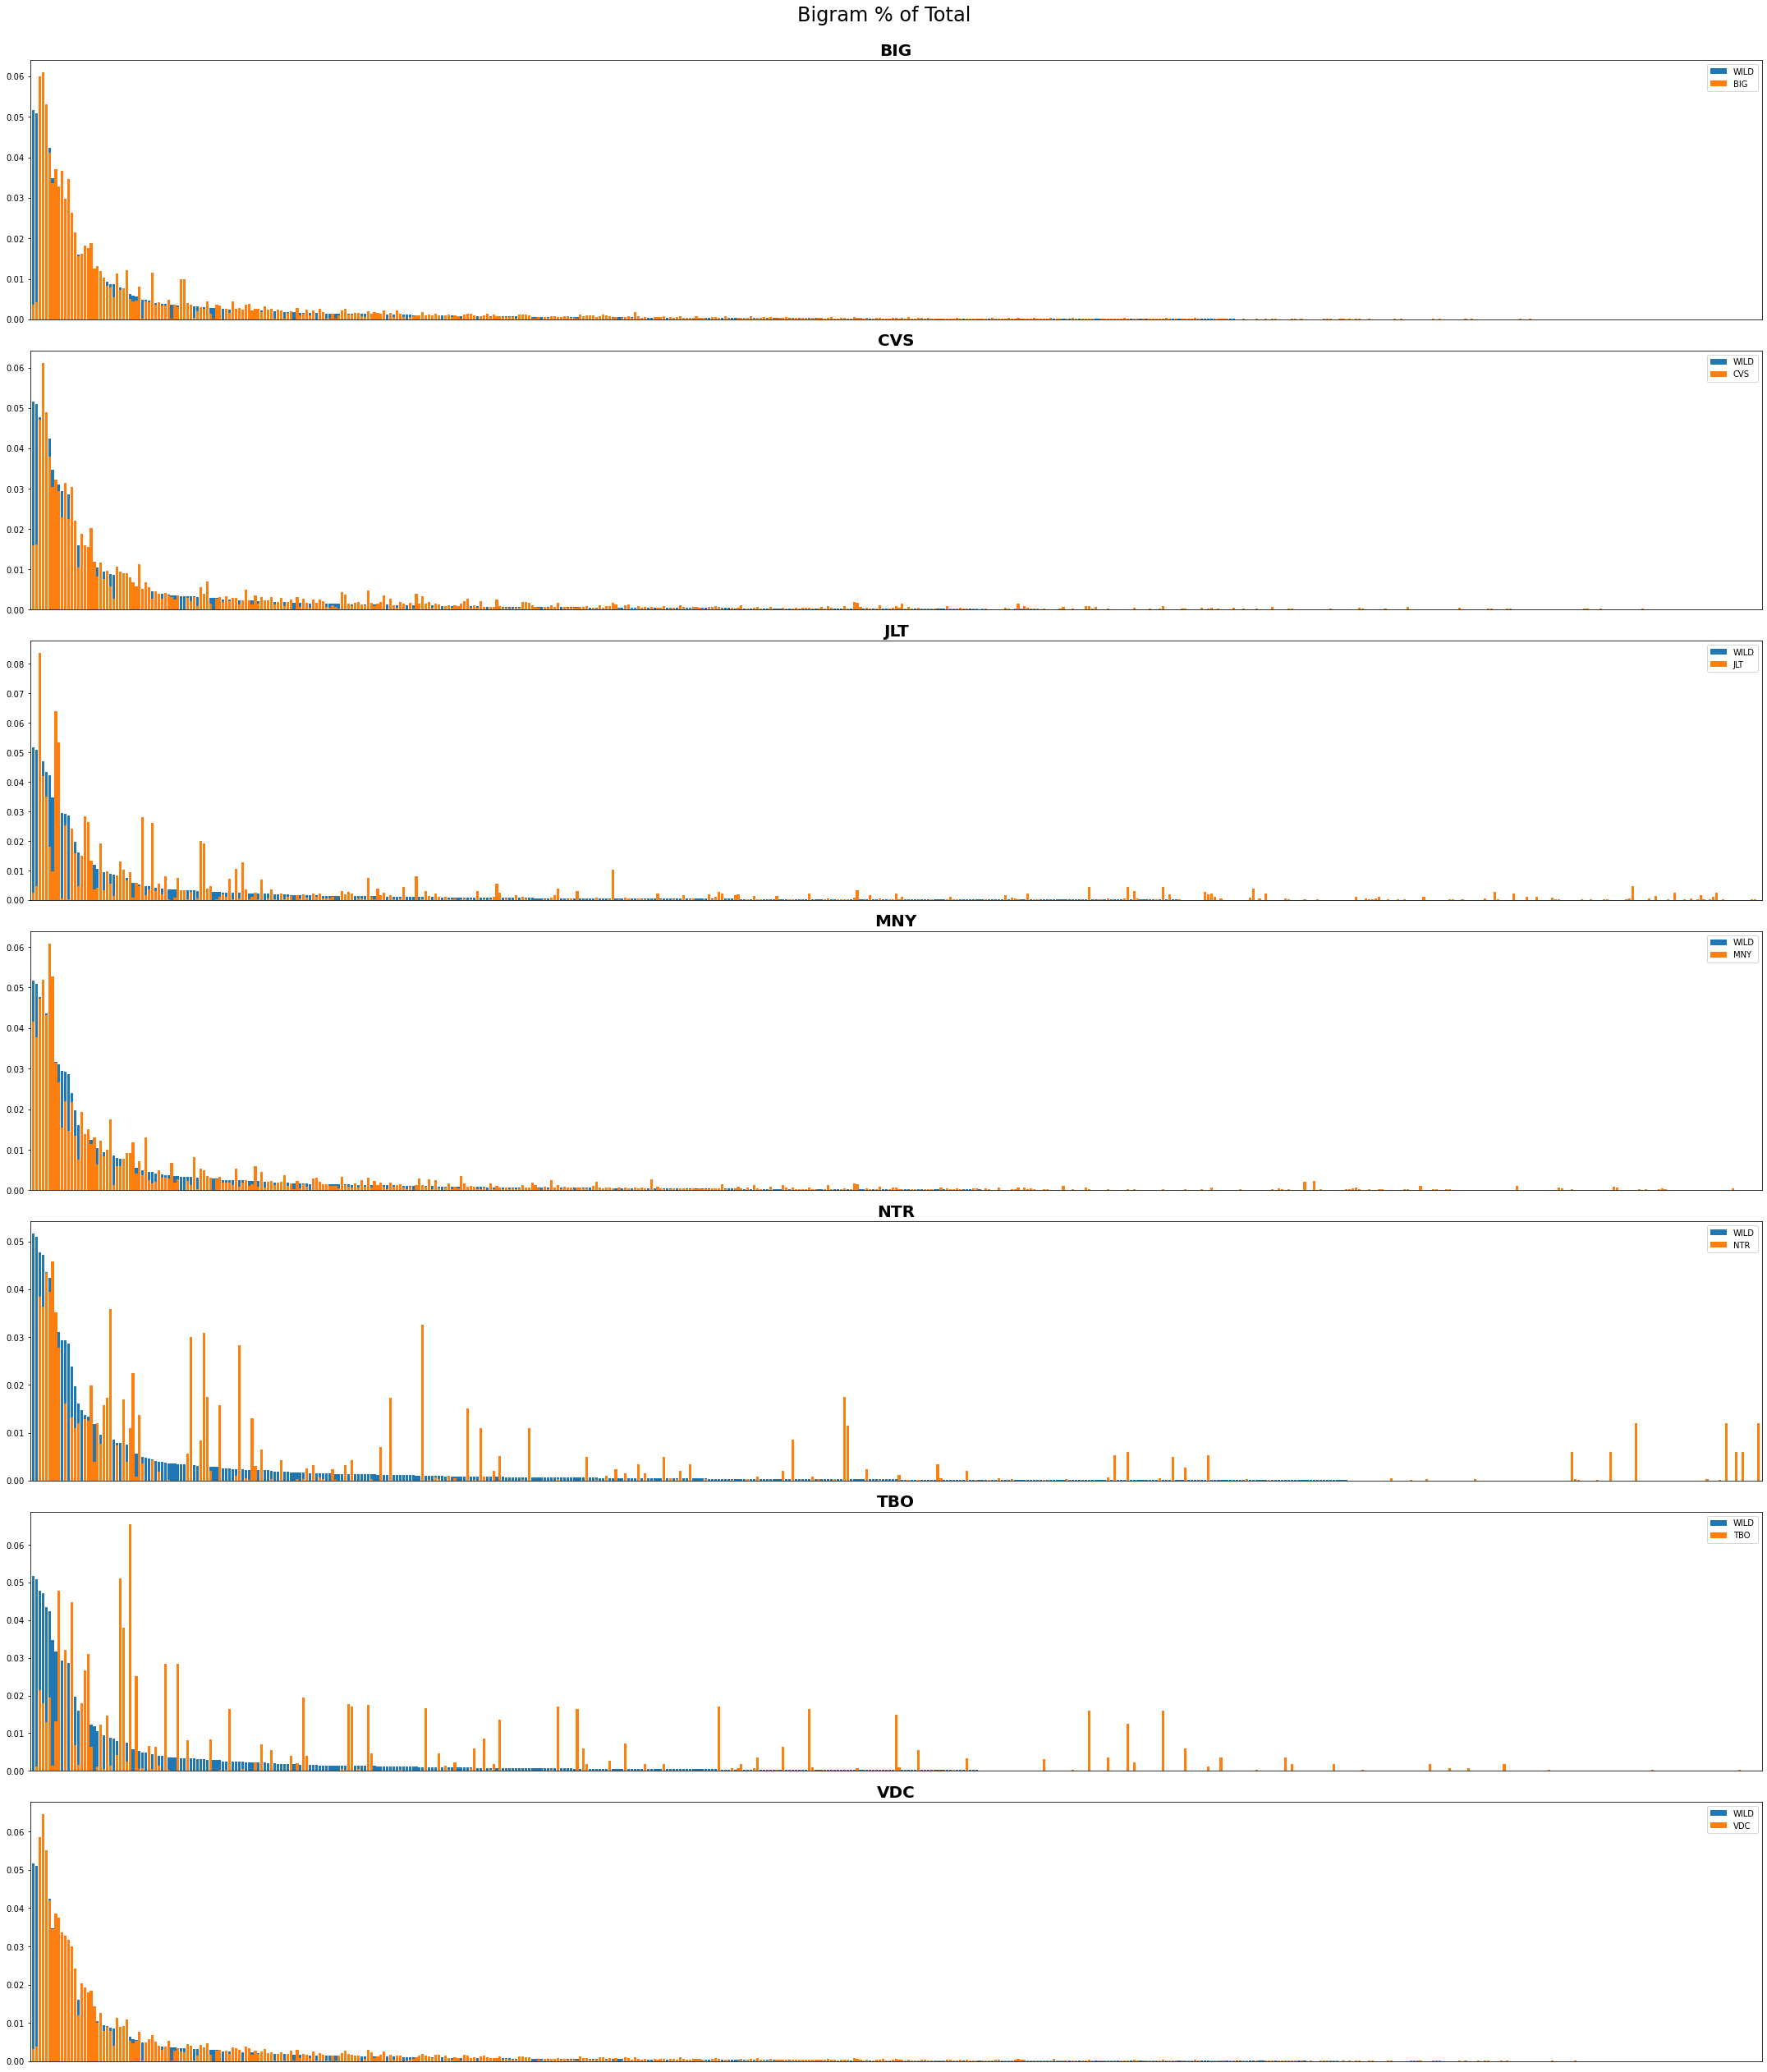

In [4]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(30, 5 * 7))

for name, ax in zip(df.columns[1:-1], axes.ravel()):
    ax.bar(df.bigram_type, df.WILD)
    ax.bar(df.bigram_type, df[name])
    ax.legend(['WILD', name])
    ax.set_title(name, fontweight='bold', fontsize=20)
    ax.set_xticks([])
#     ax.set_xticks(df.token_type)
#     ax.set_xticklabels(df.token_type, rotation=90, fontsize=14)
    ax.set_xlim(-1, df.shape[0])

fig.suptitle('Bigram % of Total', fontsize=24, y=1.0)
fig.tight_layout()
fig.show()
plt.savefig('img/bigram-perc-diff-with-wild.svg')

In [6]:
df_diff = df.iloc[:, 1:-1].subtract(df.WILD, axis=0).abs()

df_mets = pd.DataFrame()
df_mets['%diff-mean'] = df_diff.mean()
df_mets['%diff-sum'] = df_diff.sum()
df_mets['log diff-mean'] = df_log.abs().mean()
df_mets['log diff-sum'] = df_log.abs().sum()
df_mets['% missing'] = df_log.isna().sum() / df.shape[0]
df_mets = df_mets.sort_values(by='%diff-sum')
df_mets

,%diff-mean,%diff-sum,log diff-mean,log diff-sum,% missing
BIG,0.000620,0.333141,0.673323,357.534494,0.011173
CVS,0.000645,0.346626,0.960828,495.787298,0.039106
VDC,0.000660,0.354301,0.835452,447.802118,0.001862
MNY,0.000669,0.359153,1.105856,589.421495,0.007449
JLT,0.001543,0.828749,2.145743,849.714317,0.262570
NTR,0.001830,0.982650,1.735233,237.726874,0.744879
TBO,0.002367,1.270865,1.907329,387.187821,0.621974
